In [1]:
!nvidia-smi

Tue May 14 14:37:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (325/325), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 325 (delta 165), reused 263 (delta 162), pack-reused 0
Receiving objects: 100% (325/325), 2.23 MiB | 14.13 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.4 MB/s eta 0:00:00


In [4]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00


In [5]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [6]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x 2 root root      4096 May 14 14:39 .
drwxr-xr-x 1 root root      4096 May 14 14:39 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


In [7]:
!wget -P {HOME}/data -q https://www.denimjeansobserver.com/mag/designer-denim-jeans-fashion/2014/ss/brands-l01/louis-vuitton-marc-jacobs-paris-france-2014-resort-cruise-pre-spring-primavera-donna-womens-fashion-show-presentation-denim-jeanswear-skirt-shredded-hem-boucle-01x.jpg

In [11]:
SOURCE_IMAGE_PATH = f"{HOME}/dog.jpeg"

In [12]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/data/dog.jpeg: 640x640 2 persons, 51.9ms
Speed: 0.6ms pre-process, 51.9ms inference, 1109.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


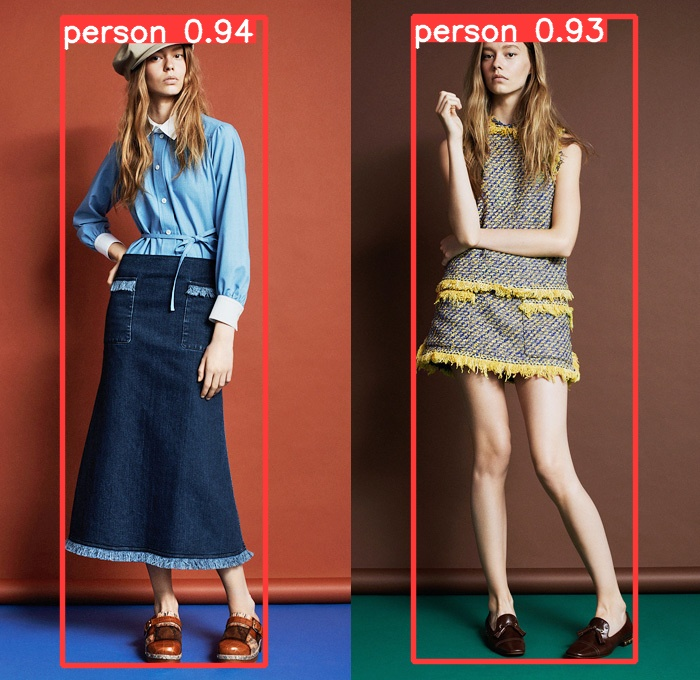

In [13]:
from IPython.display import Image
Image(filename=f"/content/yolov9/runs/detect/exp2/dog.jpeg", width=600)

In [14]:
from roboflow import Roboflow
from google.colab import userdata

def get_data(api):
  rf = Roboflow(api_key=api)
  project = rf.workspace("srddev").project("deepfashion2-bfwof")
  version = project.version(1)
  dataset = version.download("yolov9")

# get_data(userdata.get('roboflow'))
get_data(api='HXexb85lWIHRx8LPjcDp')

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to DeepFashion2-1 in yolov9:: 100%|██████████| 1168/1168 [00:00<00:00, 6945.38it/s]


In [ ]:
 !python /content/yolov9/segment/train.py --workers 8 --device 0 --batch 32  --data coco.yaml --img 640 --cfg models/segment/gelan-c-seg.yaml --weights '' --name gelan-c-seg --hyp hyp.scratch-high.yaml --no-overlap --epochs 300 --close-mosaic 10

In [17]:
%cd {HOME}/yolov9

!python /content/yolov9/segment/train.py --config /content/config.yaml

/content/yolov9
2024-05-14 14:49:32.347607: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 14:49:32.347684: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 14:49:32.349024: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-14 14:49:33.460241: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/DeepFashion2-1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False

In [18]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1715698174.1d4089cf0194.3974.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


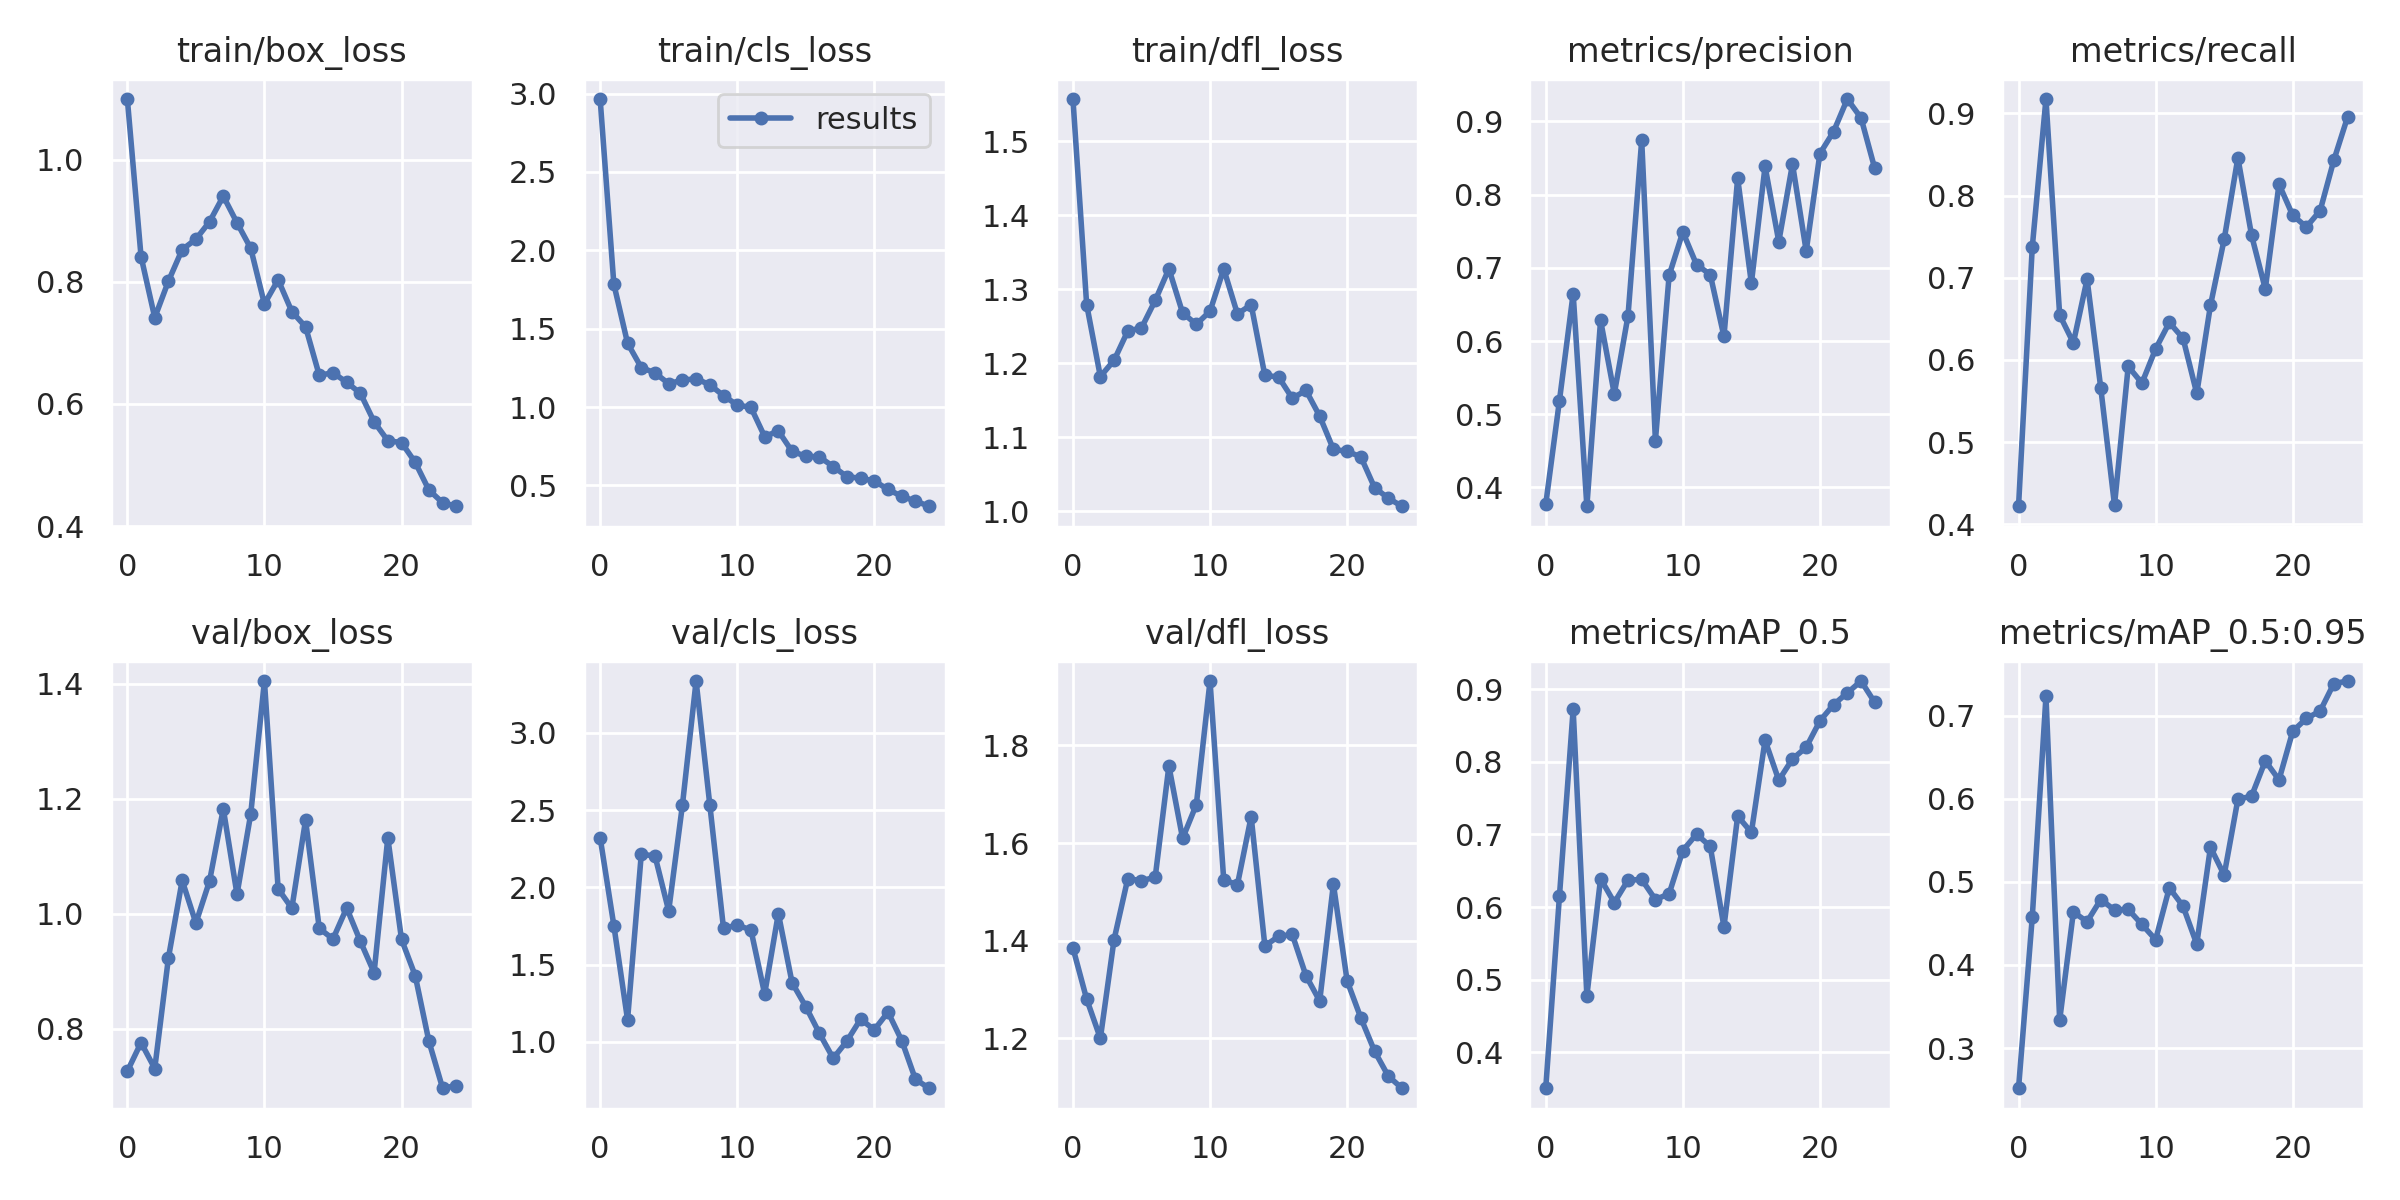

In [19]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

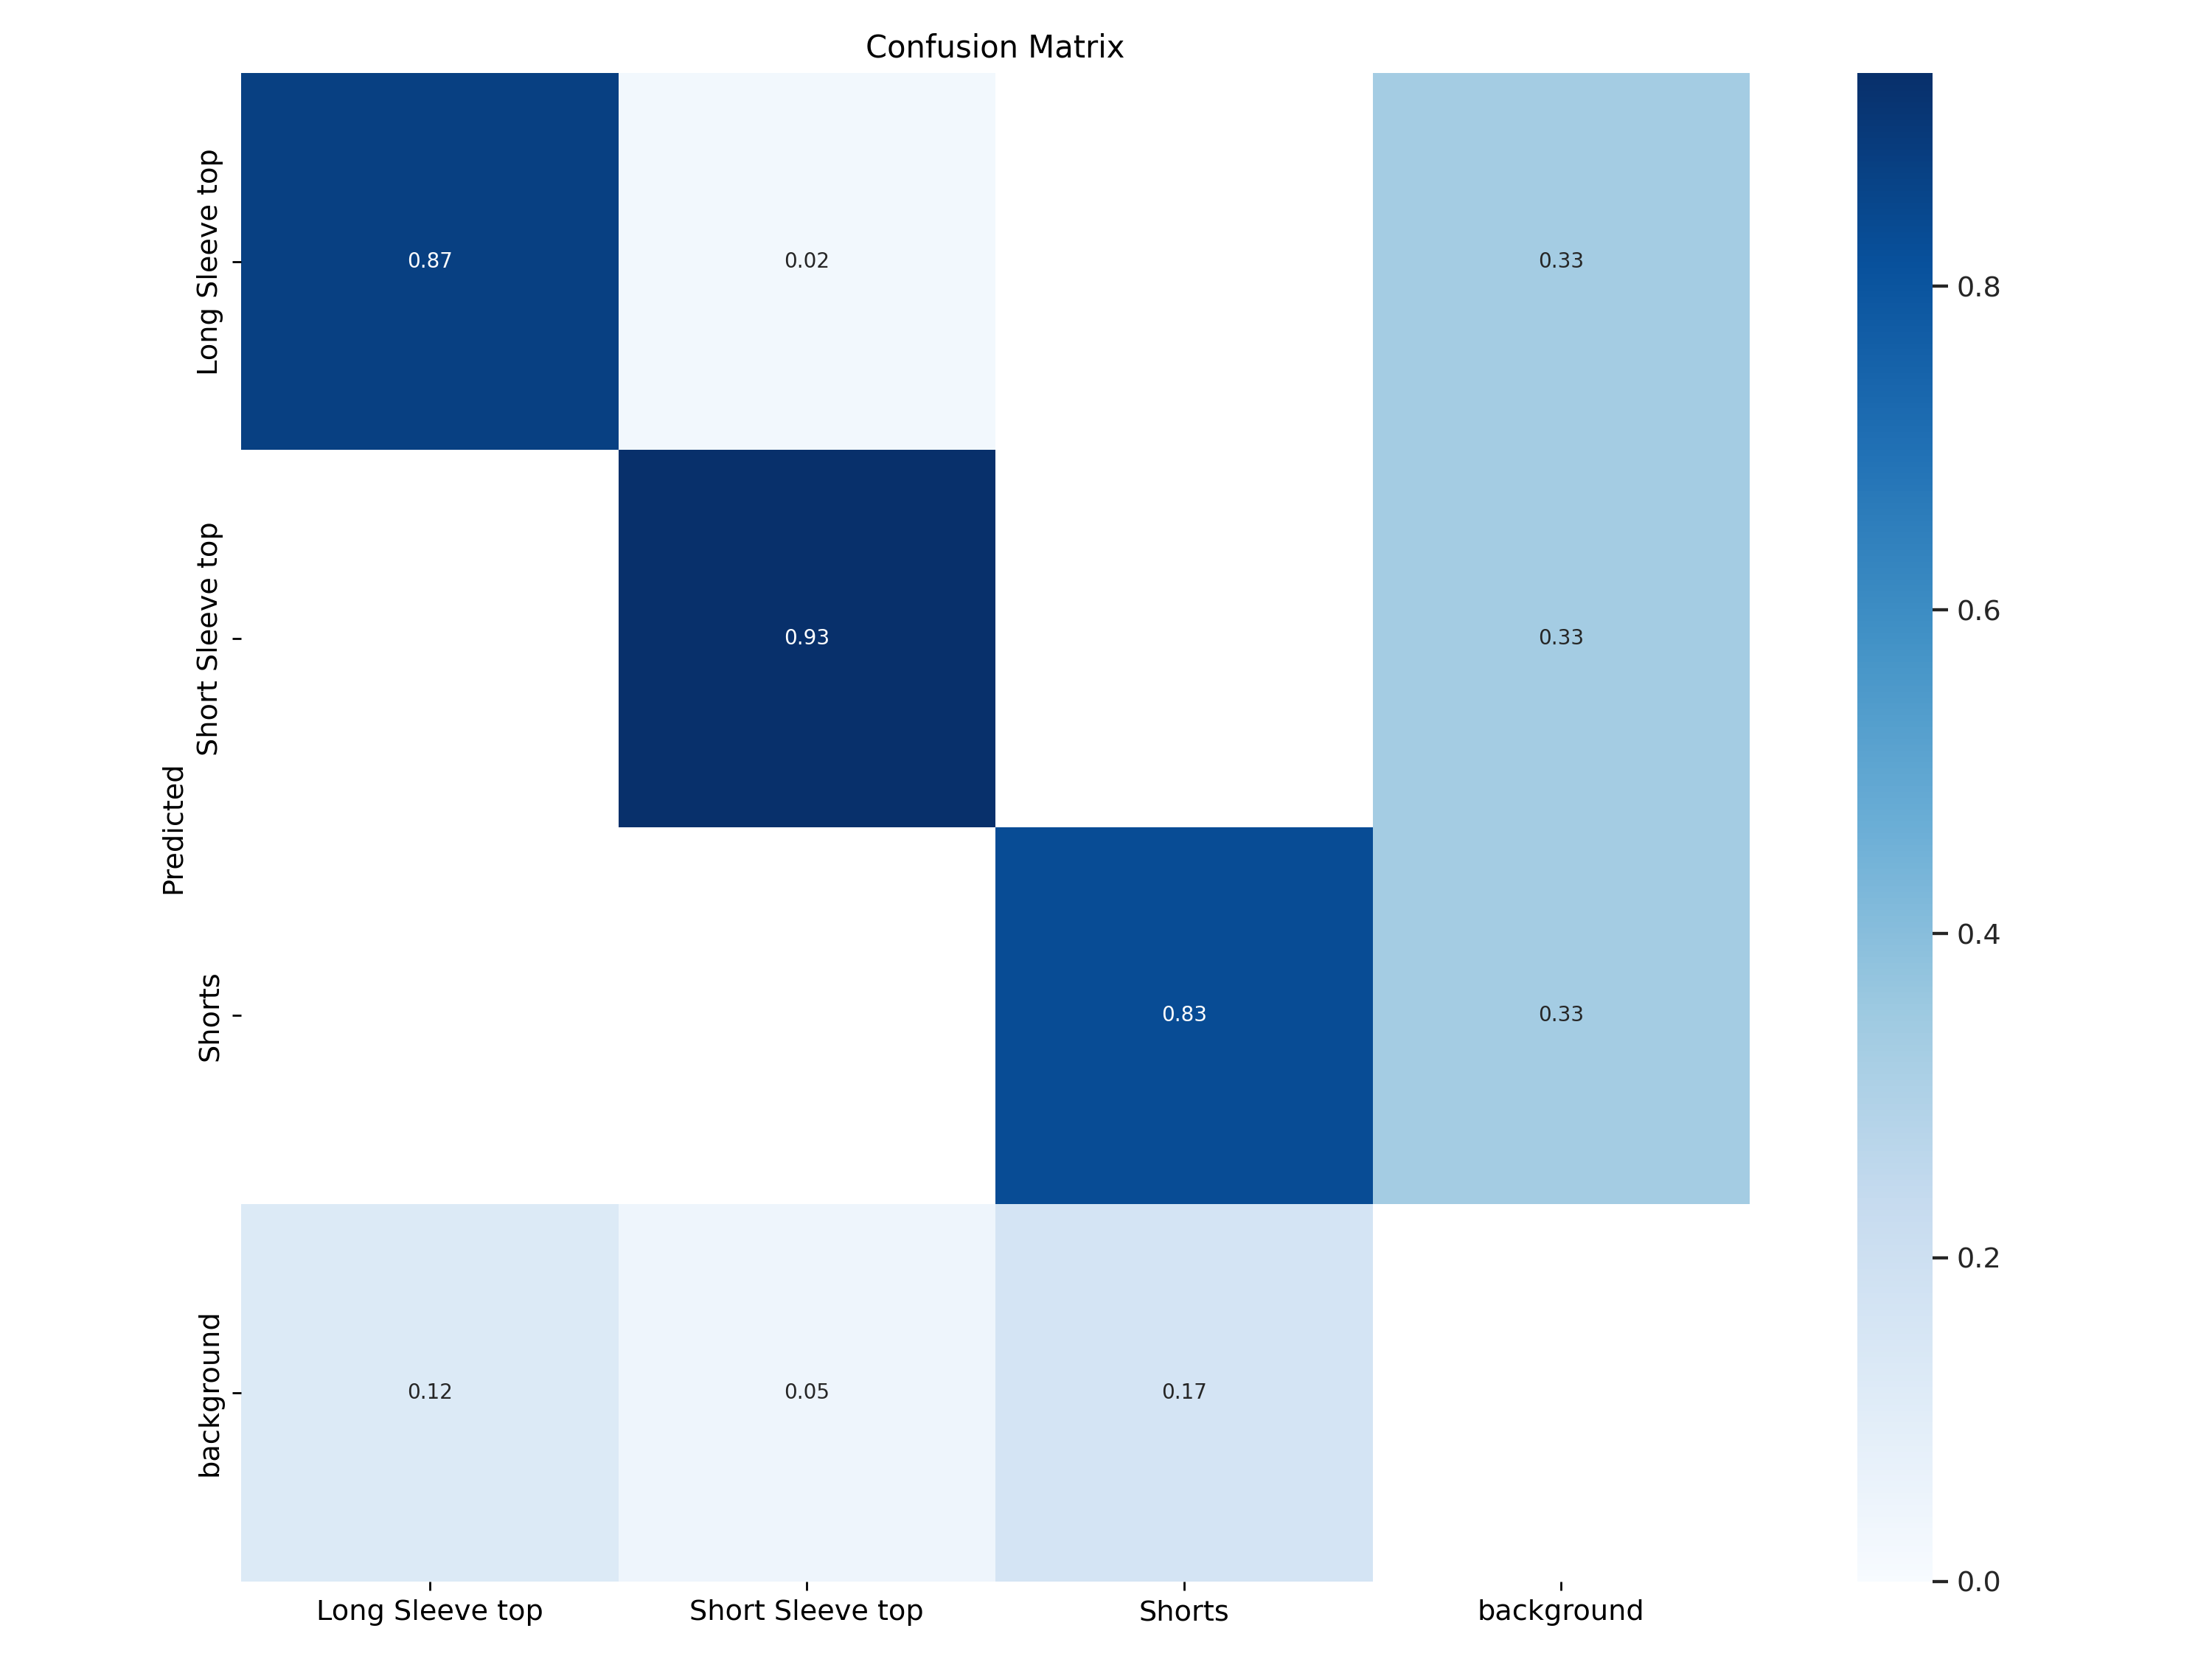

In [20]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

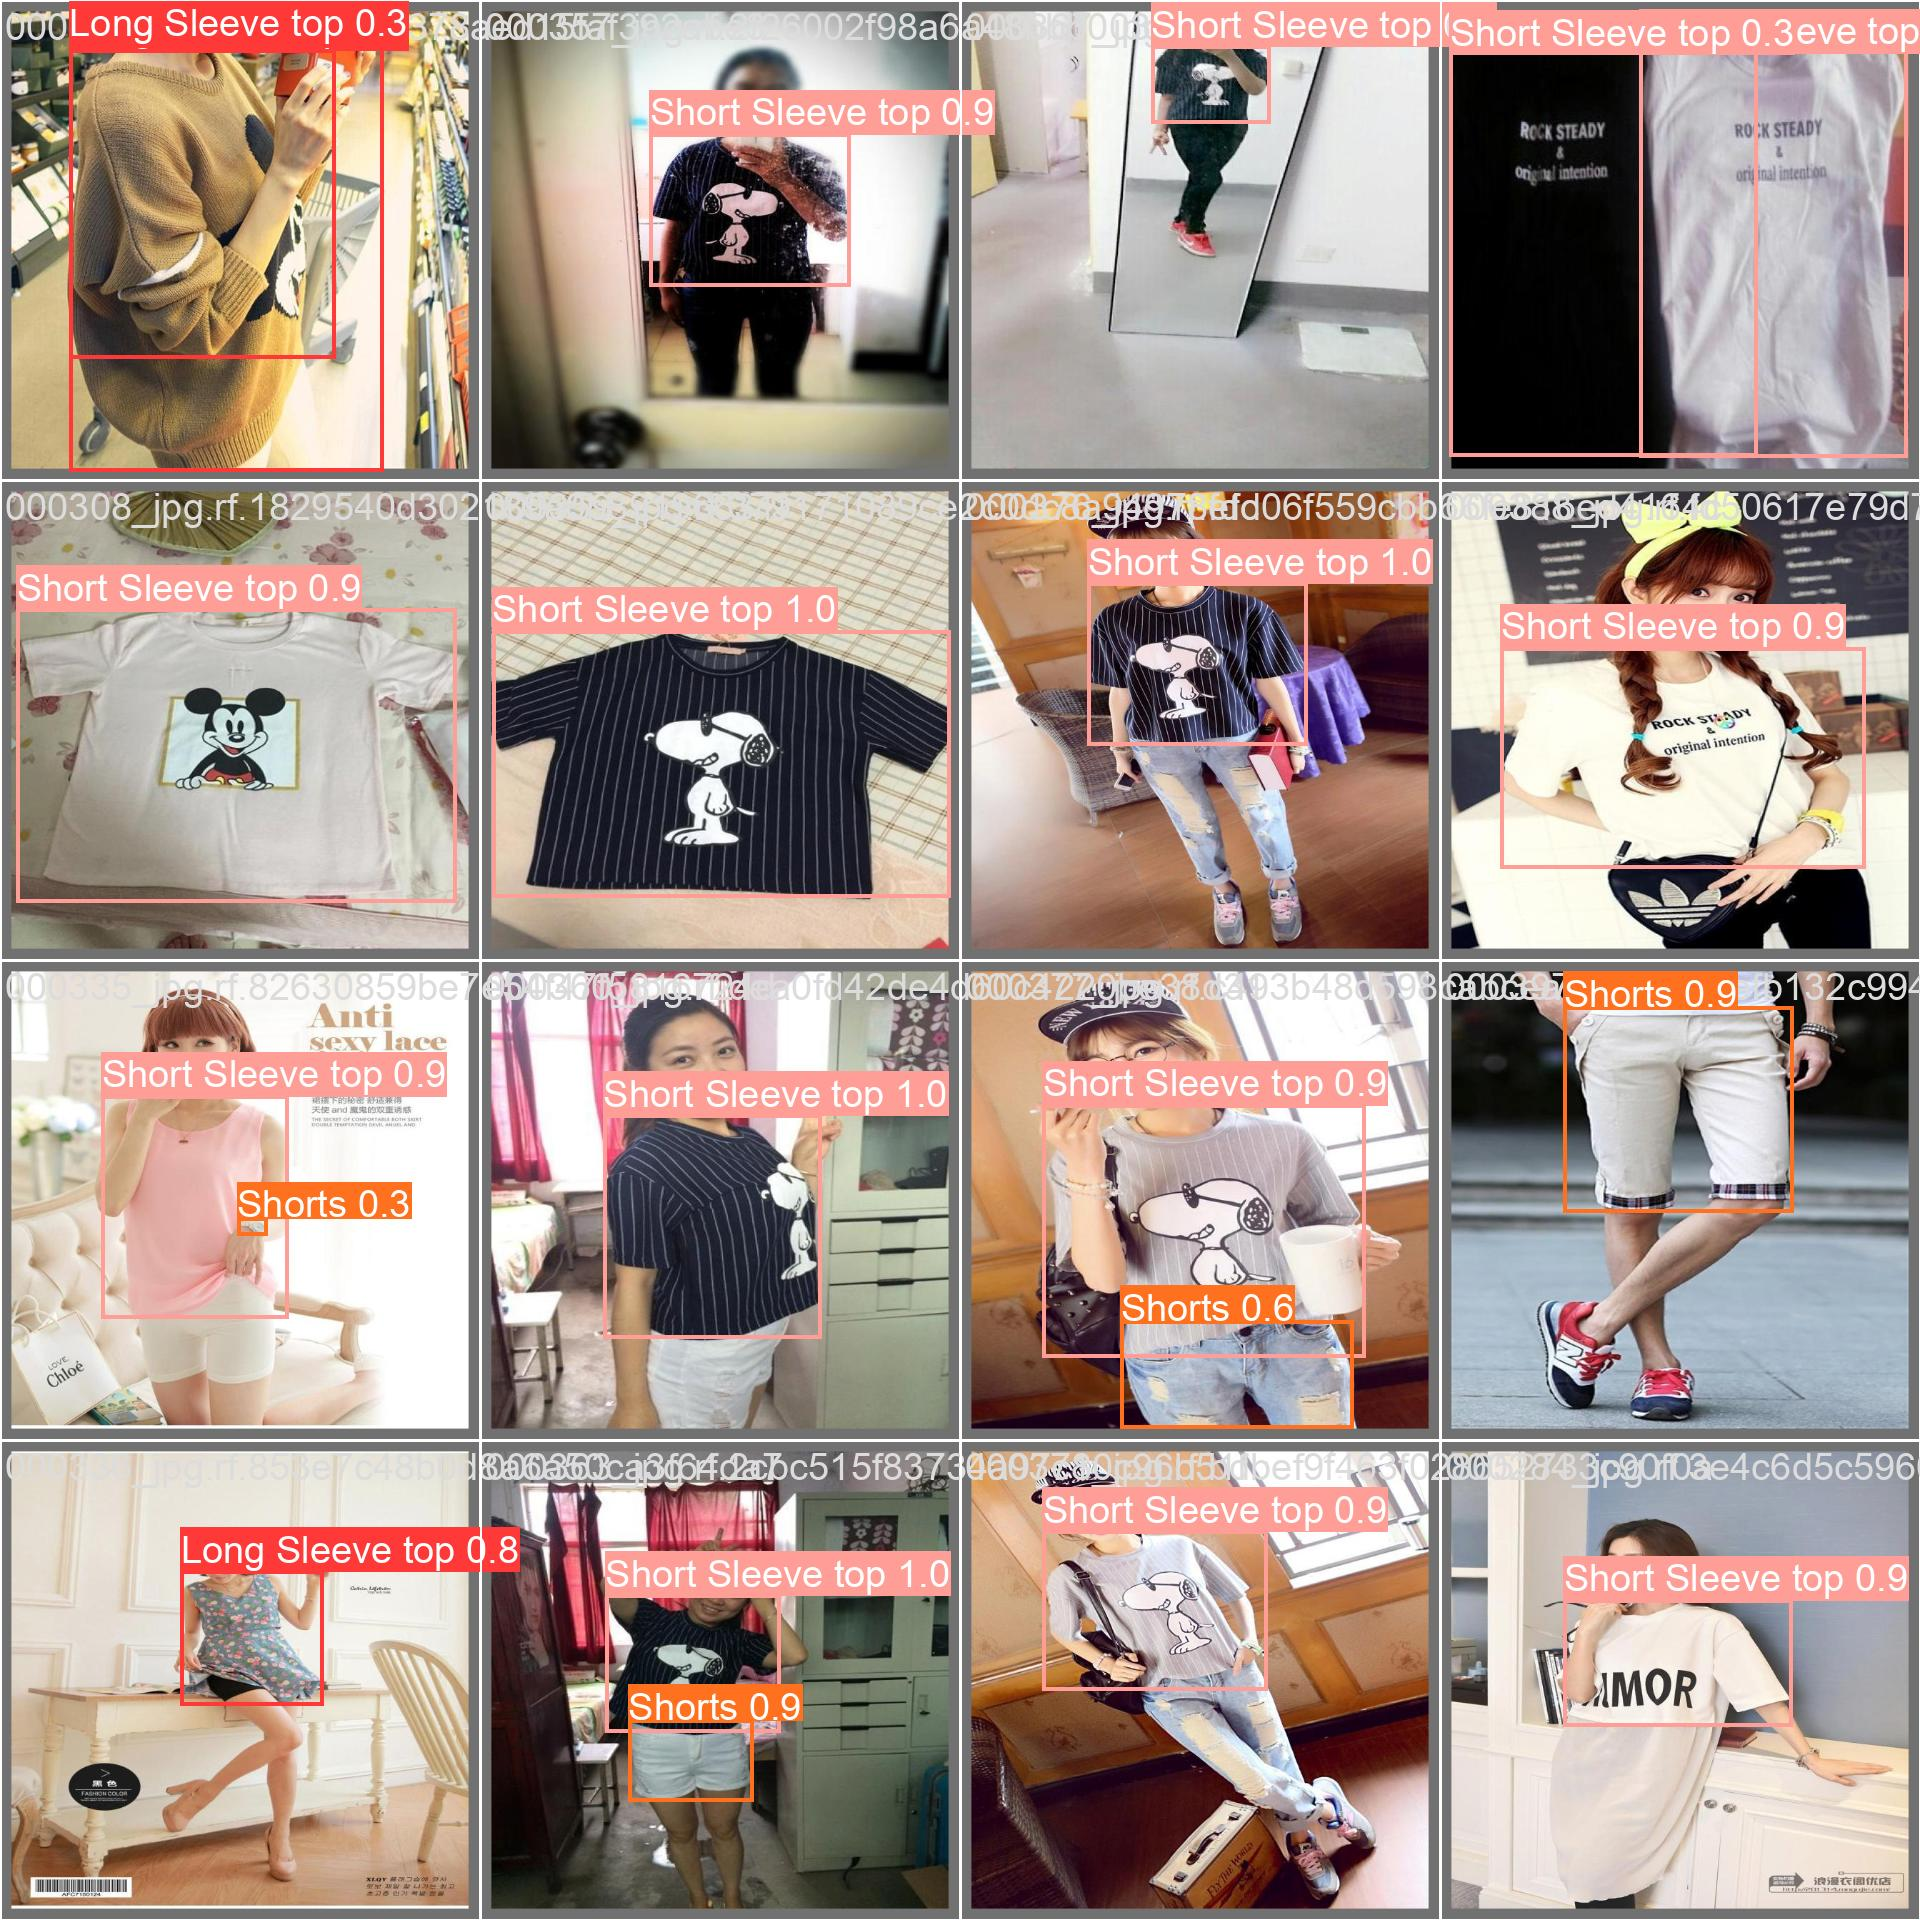

In [21]:
from IPython.display import Image
Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

VALIDATE CUSTOM MODEL

In [23]:
%cd {HOME}/yolov9

!python /content/yolov9/segment/train.py --config /content/val_config.yaml

/content/yolov9
val: data=/content/yolov9/DeepFashion2-1/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25413273 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/DeepFashion2-1/valid/labels.cache... 68 images, 0 backgrounds, 0 corrupt: 100% 68/68 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  I

In [24]:
%cd {HOME}/yolov9

!python /content/yolov9/segment/train.py --config /content/test_config.yaml

detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/DeepFashion2-1/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25413273 parameters, 0 gradients, 102.5 GFLOPs
image 1/34 /content/yolov9/DeepFashion2-1/test/images/000002_jpg.rf.a14e3db6fd2b3212fd3f241e8eef42b2.jpg: 1280x1280 1 Short Sleeve top, 112.2ms
image 2/34 /content/yolov9/DeepFashion2-1/test/images/000007_jpg.rf.99dc59b589b3da9e2a9f4b8be69b556f.jpg: 1280x1280 1 Long Sleeve top, 106.2ms
image 3/34 /content/yolo

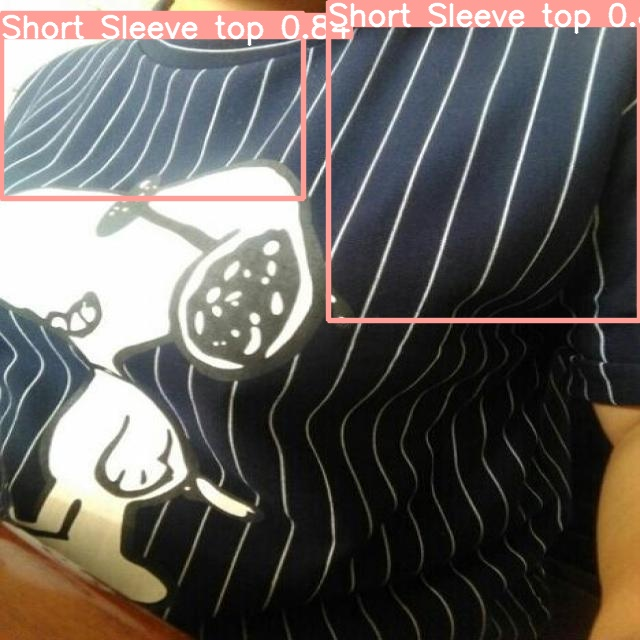

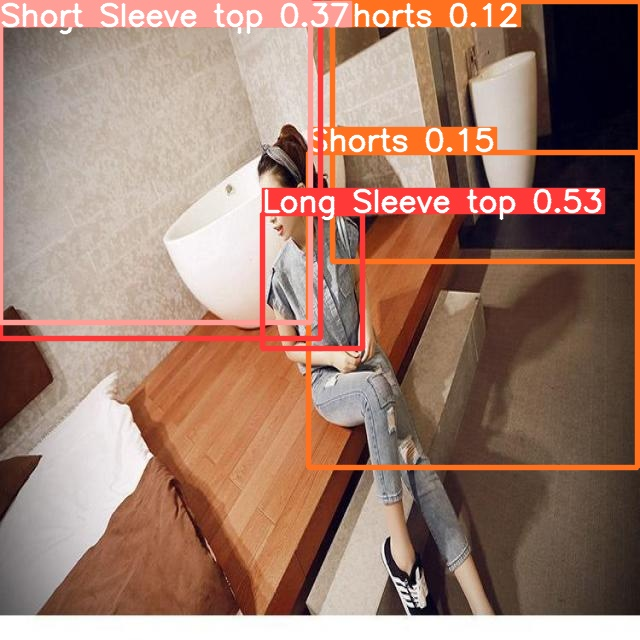

In [25]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp3/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))

Testing new weights with yolov9

In [31]:
%cd {HOME}/yolov9

!python train.py --config-file /content/config.yaml

/content/yolov9
2024-05-14 15:23:19.846919: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 15:23:19.846979: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 15:23:19.848539: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-14 15:23:20.916208: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: train.py [-h] [--weights WEIGHTS] [--cfg CFG] [--data DATA] [--hyp HYP] [--epochs EPOCHS]
                [--batch-size BATCH_SIZE] [--imgsz IMGSZ] [--rect] [--resume [RESUME]] [--nosave]
                [--noval] [--n

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 8 --epochs 8--img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/yolov9/DeepFashion2-1/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

In [32]:
!python train.py --weights '/content/weights/yolov9-c.pt' --cfg '/content/SRD_seg.yaml' --data '/content/yolov9/DeepFashion2-1/data.yaml' --hyp '/content/yolov9/data/hyps/hyp.scratch-high.yaml' --epochs 100 --batch-size 8 --imgsz 640 --workers 8 --device 0 --rect --name 'Detection_Instance' --resume --nosave --noval --noautoanchor --noplots --optimizer 'SGD' --sync-bn --project 'runs/train-seg' --exist-ok --quad --cos-lr --label-smoothing 0.0 --patience 100 --freeze 0 --save-period -1 --seed 0 --local_rank -1

2024-05-14 15:23:54.565663: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 15:23:54.565706: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 15:23:54.567012: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-14 15:23:55.636330: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/yolov9-c.pt, cfg=/content/SRD_seg.yaml, data=/content/yolov9/DeepFashion2-1/data.yaml, hyp=/content/yolov9/data/hyps/hyp.scratch-high.yaml, epochs=100, batch_size=8, imgsz=640, rect=True, resume=True, nosave=T

In [37]:
%cd {HOME}/yolov9

!python /content/yolov9/segment/train.py --config /content/config.yaml

/content/yolov9
2024-05-14 15:33:55.211855: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 15:33:55.211910: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 15:33:55.213184: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-14 15:33:56.315234: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/DeepFashion2-1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False

In [38]:
!ls {HOME}/yolov9/runs/train/exp3/

confusion_matrix.png				     PR_curve.png	    val_batch0_pred.jpg
events.out.tfevents.1715700837.1d4089cf0194.15531.0  R_curve.png	    val_batch1_labels.jpg
F1_curve.png					     results.csv	    val_batch1_pred.jpg
hyp.yaml					     results.png	    val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg	    val_batch2_pred.jpg
labels.jpg					     train_batch1.jpg	    weights
opt.yaml					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg


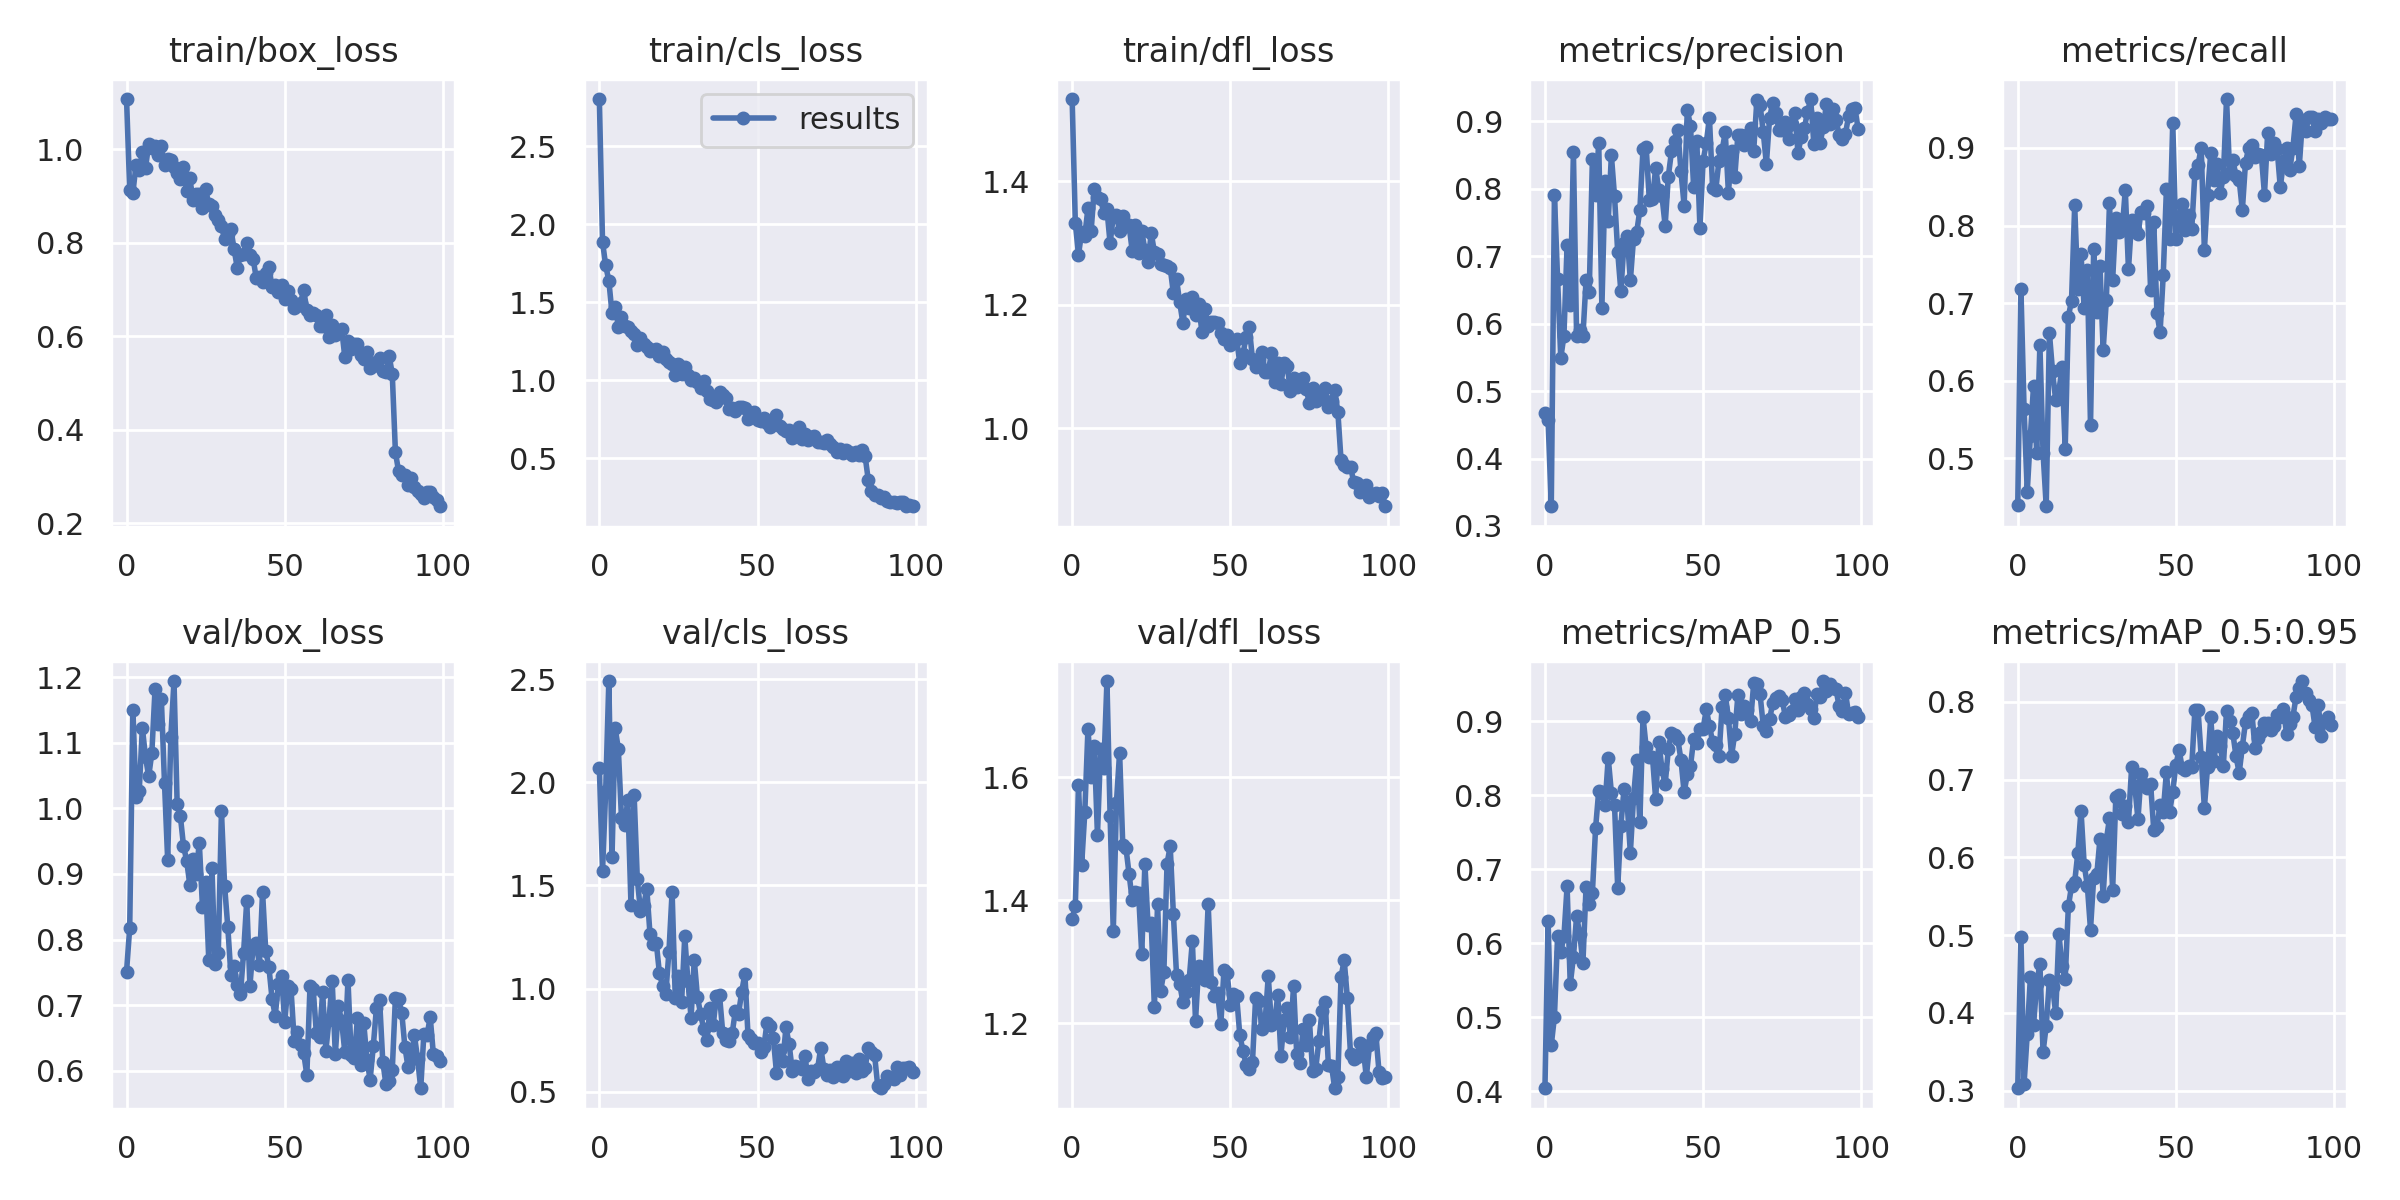

In [39]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp3/results.png", width=1000)

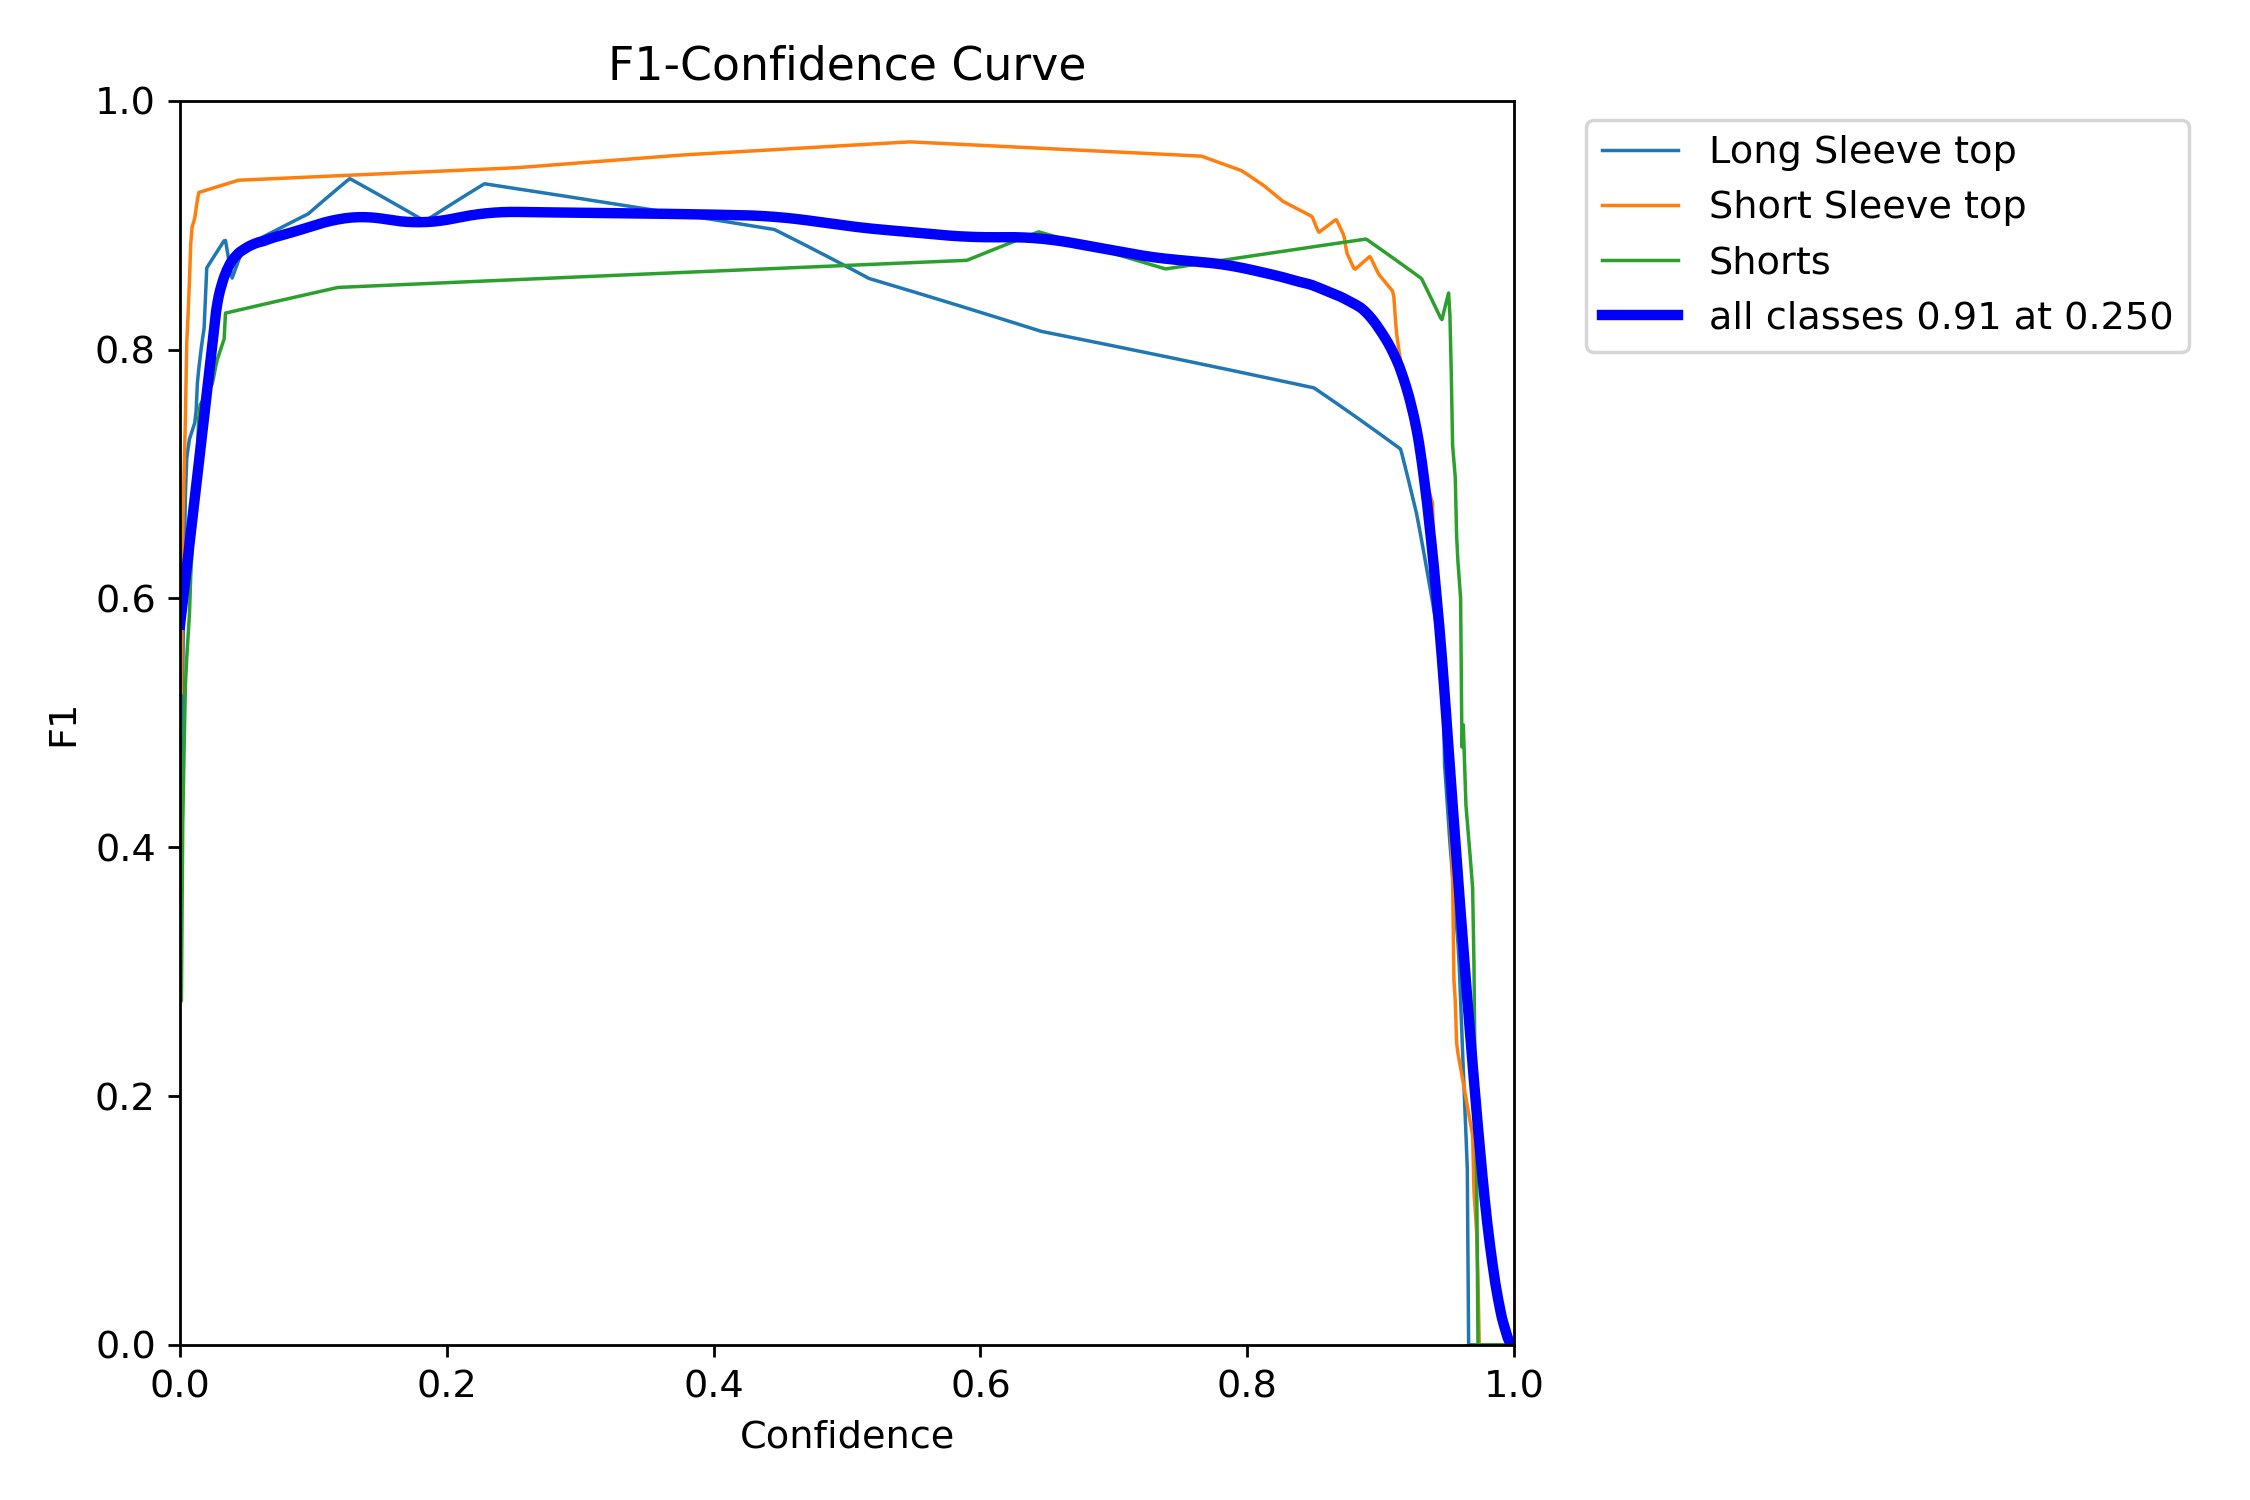

In [40]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp3/F1_curve.png", width=1000)

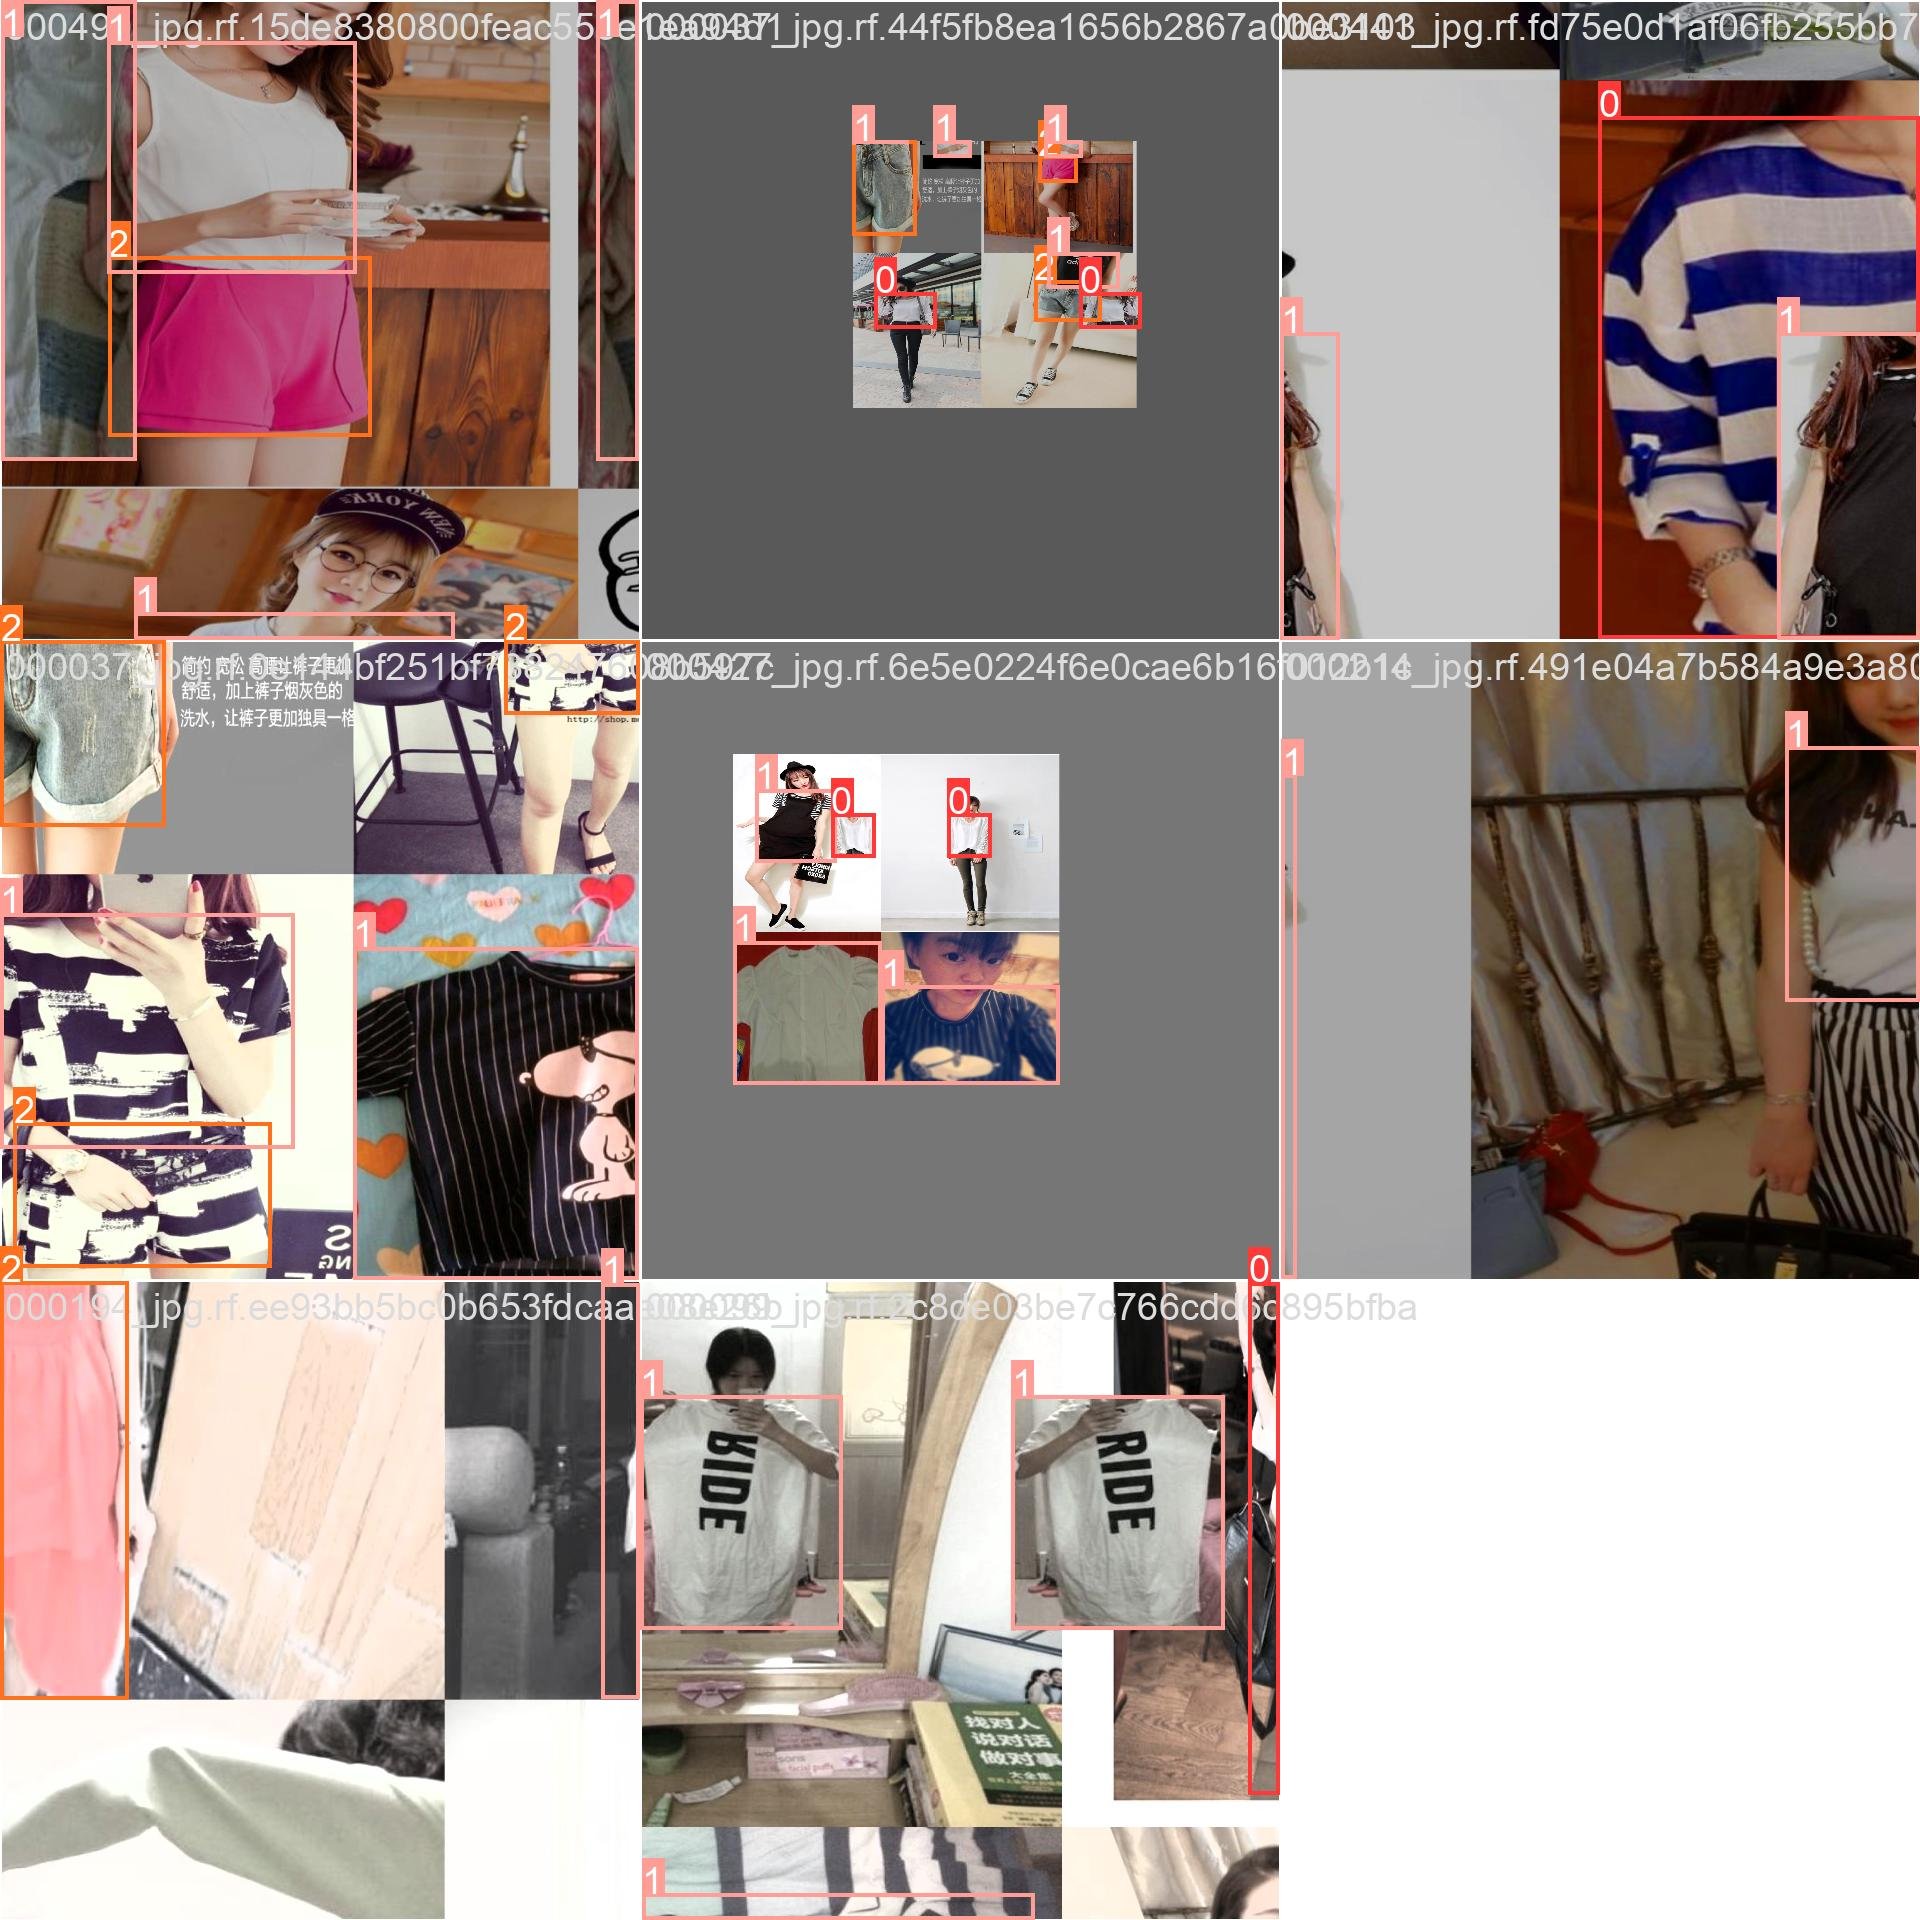

In [42]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp3/train_batch2.jpg", width=1000)

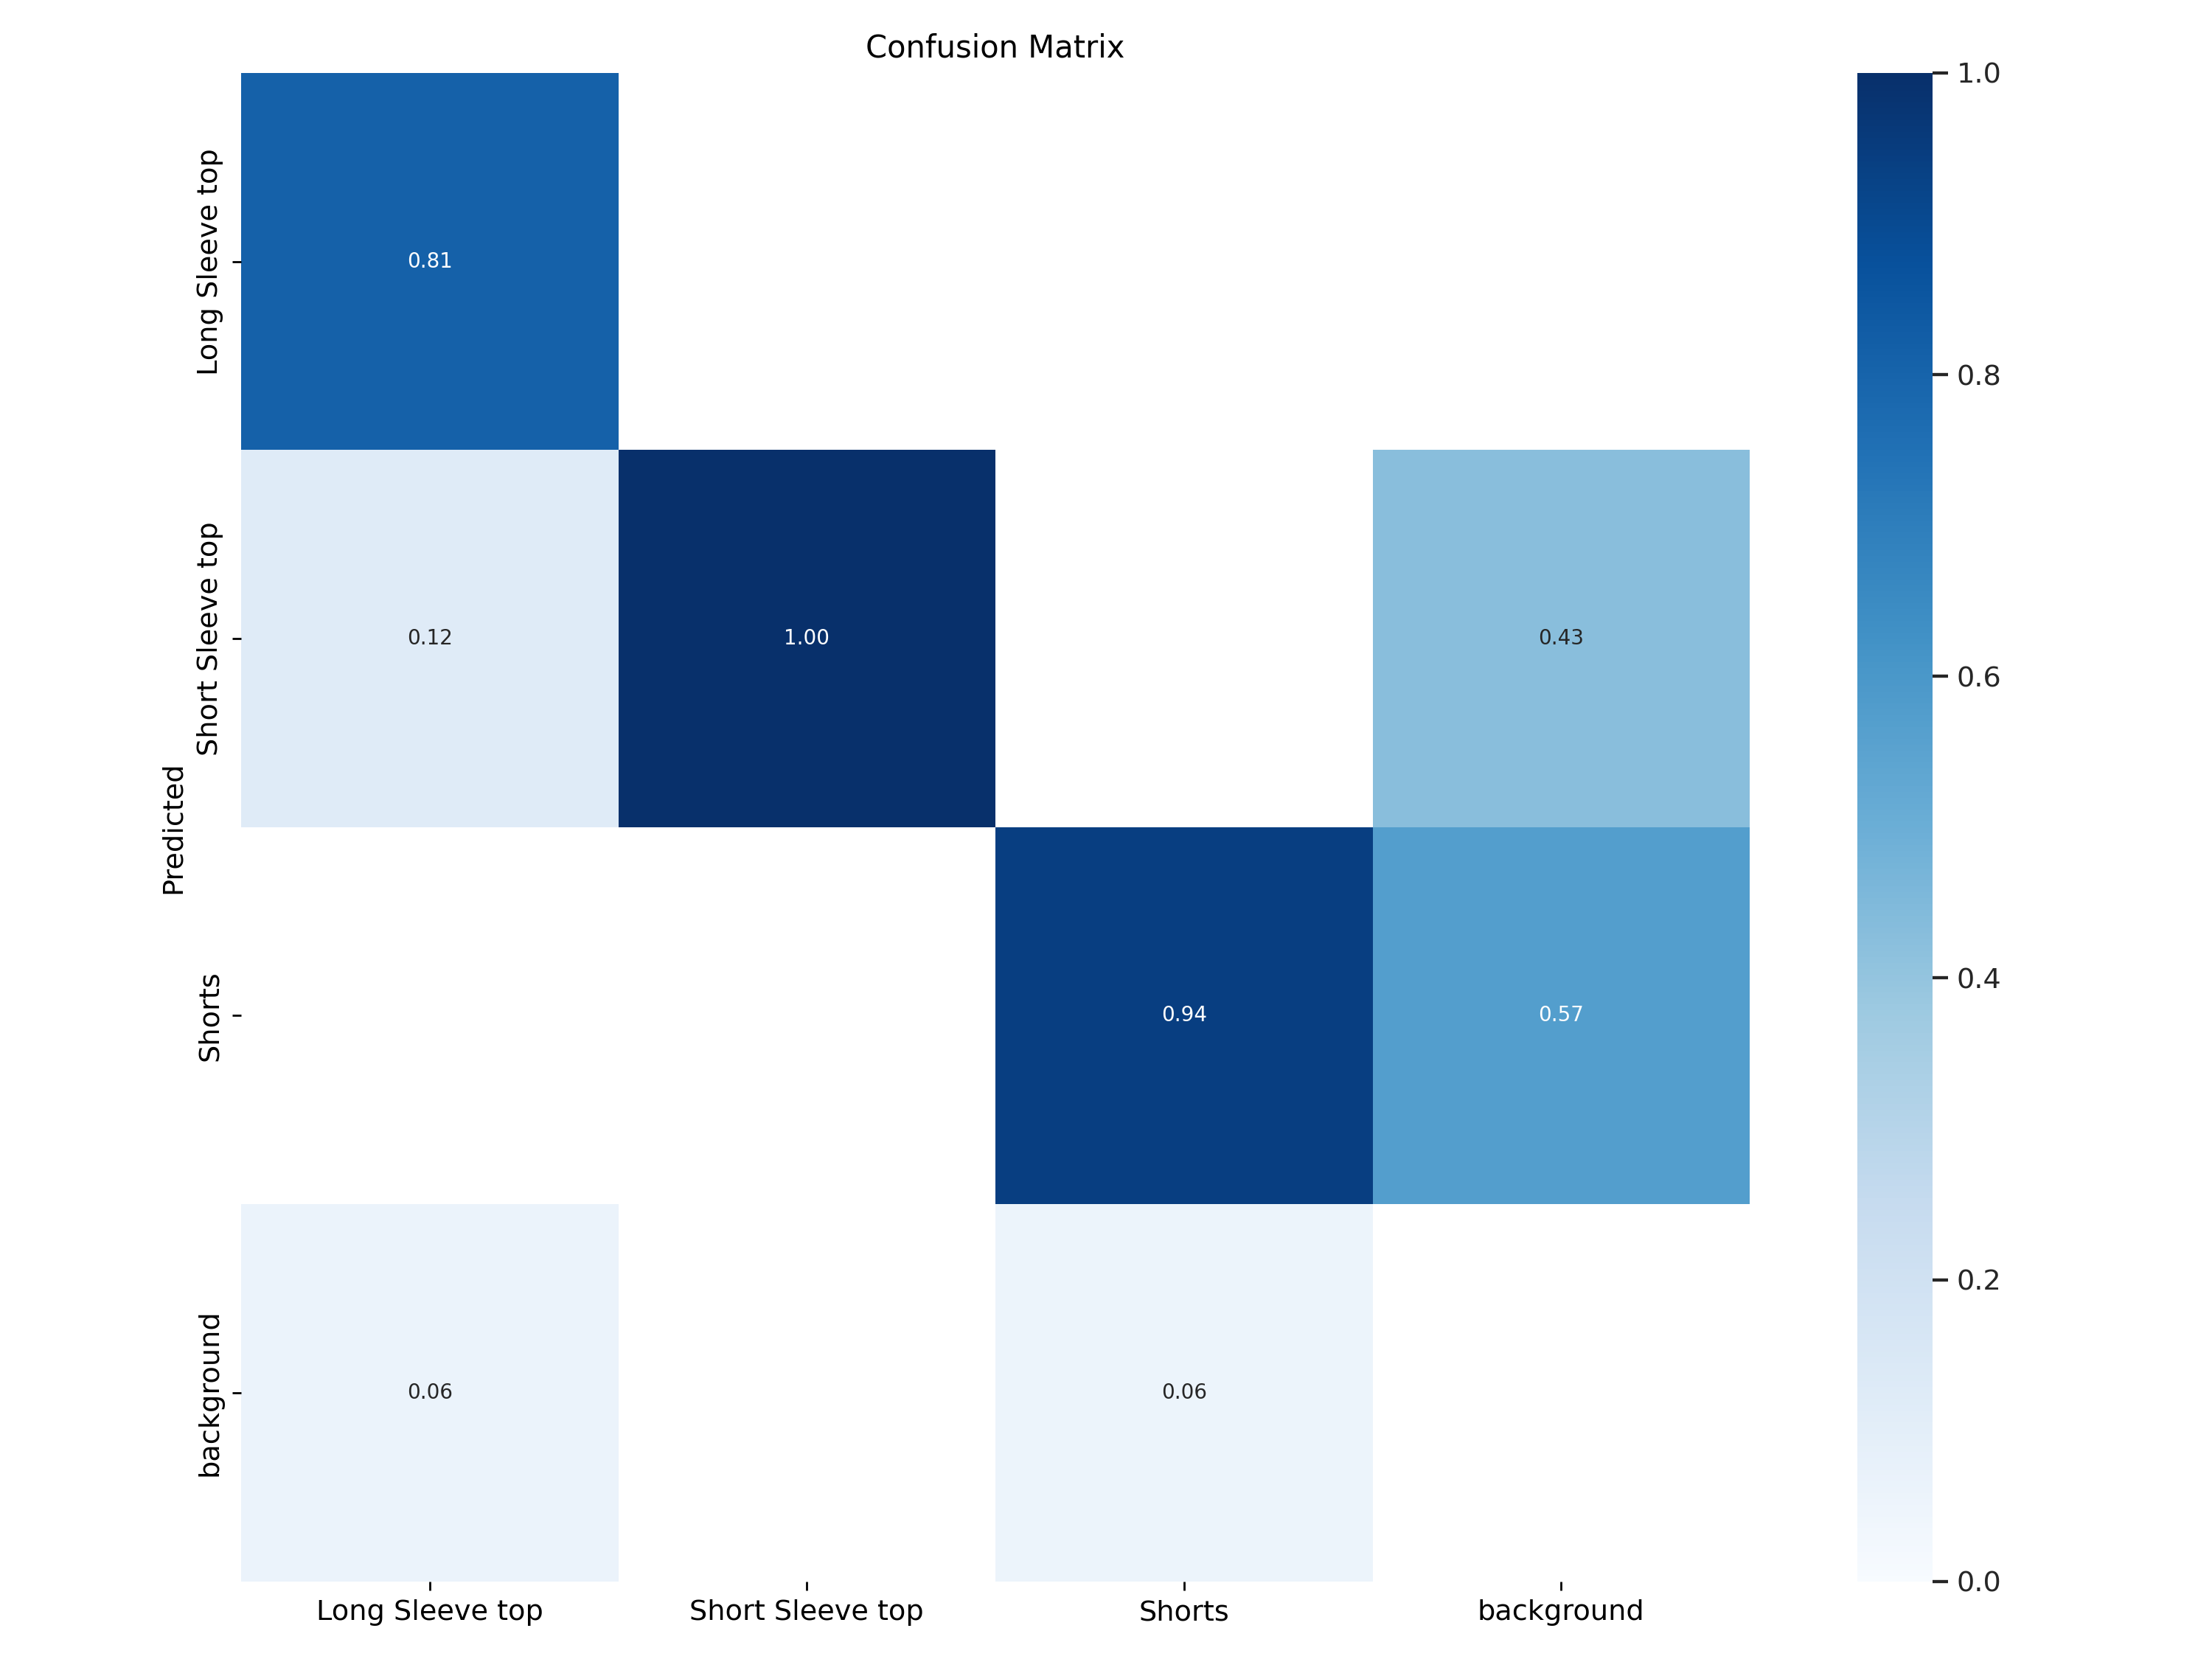

In [43]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp3/confusion_matrix.png", width=1000)

In [ ]:
import zipfile
import os

def zip_folder(folder_path, zip_filename):
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, folder_path))

# Example usage:
folder_path = '/content/yolov9/runs'
zip_filename = 'Runs.zip'
zip_folder(folder_path, zip_filename)
print(f'Folder "{folder_path}" has been zipped to "{zip_filename}"')
